In [49]:
import numpy as np
from skimage.measure import block_reduce
import skimage
import scipy.io
import os
from IPython.core.debugger import set_trace
from skimage.transform import resize
import matplotlib.pyplot as plt

In [50]:
SimulateData  = True          # If False denotes training the CNN with SEGSaltData
ReUse         = False         # If False always re-train a network 
DataDim       = [800,101]    # Dimension of original one-shot seismic data
data_dsp_blk  = (2,1)         # Downsampling ratio of input
ModelDim      = [101,101]     # Dimension of one velocity model
label_dsp_blk = (1,1)         # Downsampling ratio of output
dh            = 10            # Space interval 


In [51]:
Epochs        = 1       # Number of epoch
TrainSize1     = 450    # Number of training set
TrainSize2     = 0   # Number in training set
TestSize      = 50      # Number of testing set
TestBatchSize = 1

In [52]:
BatchSize         = 10      # Number of batch size
LearnRate         = 1e-3      # Learning rate
Nclasses          = 1         # Number of output channels
Inchannels        = 8       # Number of input channels, i.e. the number of shots
SaveEpoch         = 20        
DisplayStep       = 2         # Number of steps till outputting stats

In [53]:
tagD0 = 'georec'
tagV0 = 'vmodel'
tagD1 = 'Rec'
tagV1 = 'vmodel'
datafilename  = tagD0
dataname      = tagD1
truthfilename = tagV0
truthname     = tagV1
main_dir   = '/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/'
data_dir    = main_dir + 'data/' 
train_data_dir  = data_dir  + 'train_data/'        # Replace your training data path here
test_data_dir   = data_dir  + 'test_data/'         # Replace your testing data path here
# Define directory for simulate data and SEG data respectively
if SimulateData:
    train_data_dir  = train_data_dir + 'SimulateData/'
    test_data_dir   = test_data_dir  + 'SimulateData/'
else:
    train_data_dir  = train_data_dir + 'SEGSaltData/'
    test_data_dir   = test_data_dir  + 'SEGSaltData/'

## Create Results and Models path
if os.path.exists('./results/') and os.path.exists('./models/'):
    results_dir     = main_dir + 'results/' 
    models_dir      = main_dir + 'models/'
else:
    os.makedirs('./results/')
    os.makedirs('./models/')
    results_dir     = main_dir + 'results/'
    models_dir      = main_dir + 'models/'
if SimulateData:
    results_dir     = results_dir + 'SimulateResults/'
    models_dir      = models_dir  + 'SimulataModel/'
else:
    results_dir     = results_dir + 'SEGSaltResults/'
    models_dir      = models_dir  + 'SEGSaltModel/'
if os.path.exists(results_dir) and os.path.exists(models_dir):  
    results_dir     = results_dir
    models_dir      = models_dir 
else:
    os.makedirs(results_dir)
    os.makedirs(models_dir)
    results_dir     = results_dir
    models_dir      = models_dir
# Create Model name
if SimulateData:
    tagM = 'Simulate'
else:
    tagM = 'SEGSalt'
tagM0 = '_FCNVMBModel'
tagM1 = '_TrainSize' + str(TrainSize)
tagM2 = '_Epoch'     + str(Epochs)
tagM3 = '_BatchSize' + str(BatchSize)
tagM4 = '_LR'        + str(LearnRate)

modelname = tagM+tagM0+tagM1+tagM2+tagM3+tagM4
# Change here to set the model as the pre-trained initialization
premodelname = 'Simulate_FCNVMBModel_TrainSize1600_Epoch100_BatchSize10_LR0.001' 

NameError: name 'TrainSize' is not defined

In [54]:
# downsampling function by taking the middle value
def decimate(a,axis):
    idx = np.round((np.array(a.shape)[np.array(axis).reshape(1,-1)]+1.0)/2.0-1).reshape(-1)
    downa = np.array(a)[:,:,idx[0].astype(int),idx[1].astype(int)]
    return downa

In [55]:
os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Fault/trainA')
os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Fault/trainB')
os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Fault/trainC')

os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Fault/trainA')
os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Fault/trainB')
os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Fault/trainC')

0

In [56]:
TrainSize1

450

/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec1
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec2
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec3
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec4
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec5
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec6
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/

/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec59
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec60
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec61
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec62
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec63
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec64
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train

/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec118
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec119
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec120
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec121
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec122
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec123
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec

/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec175
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec176
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec177
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec178
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec179
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec180
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec

/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec238
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec239
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec240
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec241
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec242
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec243
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec

/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec297
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec298
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec299
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec300
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec301
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec302
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec

/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec358
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec359
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec360
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec361
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec362
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec363
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec

/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec422
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec423
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec424
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec425
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec426
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec427
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec

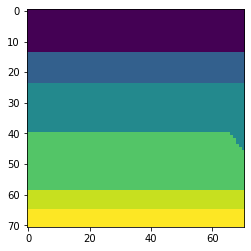

In [57]:
start = 1
train_size1 = TrainSize1
#train_size2 = TrainSize2
in_channels = Inchannels
model_dim = ModelDim
kk = 1

for i in range(start,start+train_size1):
        
    kk = kk + 1
    filename_seis = train_data_dir+'georec_trainFault/'+datafilename+str(i)
    print(filename_seis)
        # Load .mat data
    data1_set = scipy.io.loadmat(filename_seis)
        #data1_set = np.float32(data1_set[str(dataname)].reshape([data_dim[0],data_dim[1],in_channels]))
    data1_set = np.float32(data1_set[str(dataname)])
        # Change the dimention [h, w, c] --> [c, h, w]
    for k in range (0,in_channels):
        data11_set     = np.float32(data1_set[:,:,k])
        data11_set     = np.float32(data11_set)
        # Data downsampling
        # note that the len(data11_set.shape)=len(block_size.shape)=2
        #data11_set     = block_reduce(data11_set,block_size=data_dsp_blk,func=decimate)
        #data11_set     = data11_set[1:2000:5,:]
        data11_set     = np.expand_dims(data11_set,axis=0)
        data_dsp_dim   = data11_set.shape
        #data11_set     = data11_set.reshape(1,data_dsp_dim[0]*data_dsp_dim[1])
        if k==0:
            train1_set = data11_set
        else:
            train1_set = np.append(train1_set,data11_set,axis=0)
    filename_label     = '/disk/student/adhara/Fall2021/seismic-simulation-complex-media/generate_data/velocity/fault/velocity_'+str(i)+'.npy'
    data2_set          = np.load(filename_label)
    data2_set          = data2_set.T
    #data2_set          = resize(data2_set[str(truthname)],(101,101))
        # Label downsampling
    #data2_set          = block_reduce(data2_set,block_size=label_dsp_blk,func=np.max)
    label_dsp_dim      = data2_set.shape
    #data2_set          = data2_set.reshape(1,label_dsp_dim[0]*label_dsp_dim[1])
    data2_set          = np.float32(data2_set)
    #if i==start:
    #    train_set      = train1_set
    #    label_set      = data2_set
    #else:
    #    train_set      = np.append(train_set,train1_set,axis=0)
    #    label_set      = np.append(label_set,data2_set,axis=0)
        
    A = train1_set
    B = data2_set
    C = scipy.ndimage.gaussian_filter(B,sigma=10)
    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Fault/trainA/'+str(kk)+'.npy','wb')
    np.save(file,A)
    file.close()
    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Fault/trainB/'+str(kk)+'.npy','wb')
    np.save(file,B)
    file.close()
    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Fault/trainC/'+str(kk)+'.npy','wb')
    np.save(file,C)
    file.close()
    plt.imshow(B)
    
            
#train_set = train_set.reshape((train_size,in_channels,data_dsp_dim[0]*data_dsp_dim[1]))
#label_set = label_set.reshape((train_size,1,label_dsp_dim[0]*label_dsp_dim[1]))
    


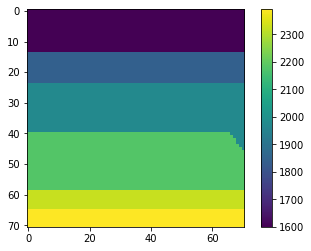

In [58]:
plt.imshow(B)
plt.colorbar()

In [59]:
A = np.load('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Fault/trainA/200.npy')
B = np.load('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Fault/trainB/200.npy')
np.shape(A)

(8, 800, 71)

In [60]:
os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Fault/testA')
os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Fault/testB')
os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Fault/testC')

os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Fault/testA')
os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Fault/testB')
os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Fault/testC')

0

In [61]:
TestSize

50

In [62]:
start = 1
train_size1 = TrainSize1
#train_size2 = TrainSize2
test_size = TestSize
in_channels = Inchannels
model_dim = ModelDim
kk = 1

for i in range(start+train_size1,start+train_size1+test_size):
        
    kk = kk + 1
    filename_seis = train_data_dir+'georec_trainFault/'+datafilename+str(i)
    print(filename_seis)
        # Load .mat data
    data1_set = scipy.io.loadmat(filename_seis)
        #data1_set = np.float32(data1_set[str(dataname)].reshape([data_dim[0],data_dim[1],in_channels]))
    data1_set = np.float32(data1_set[str(dataname)])
        # Change the dimention [h, w, c] --> [c, h, w]
    for k in range (0,in_channels):
        data11_set     = np.float32(data1_set[:,:,k])
        data11_set     = np.float32(data11_set)
        # Data downsampling
        # note that the len(data11_set.shape)=len(block_size.shape)=2
        #data11_set     = block_reduce(data11_set,block_size=data_dsp_blk,func=decimate)
        #data11_set     = data11_set[1:2000:5,:]
        data11_set     = np.expand_dims(data11_set,axis=0)
        data_dsp_dim   = data11_set.shape
        #data11_set     = data11_set.reshape(1,data_dsp_dim[0]*data_dsp_dim[1])
        if k==0:
            train1_set = data11_set
        else:
            train1_set = np.append(train1_set,data11_set,axis=0)
    filename_label     = '/disk/student/adhara/Fall2021/seismic-simulation-complex-media/generate_data/velocity/fault/velocity_'+str(i)+'.npy'
    data2_set          = np.load(filename_label)
    data2_set          = data2_set.T
        # Label downsampling
    #data2_set          = block_reduce(data2_set,block_size=label_dsp_blk,func=np.max)
    label_dsp_dim      = data2_set.shape
    #data2_set          = data2_set.reshape(1,label_dsp_dim[0]*label_dsp_dim[1])
    data2_set          = np.float32(data2_set)
    #if i==start:
    #    train_set      = train1_set
    #    label_set      = data2_set
    #else:
    #    train_set      = np.append(train_set,train1_set,axis=0)
    #    label_set      = np.append(label_set,data2_set,axis=0)
        
    A = train1_set
    B = data2_set
    C = scipy.ndimage.gaussian_filter(B,sigma=10)
    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Fault/testA/'+str(kk)+'.npy','wb')
    np.save(file,A)
    file.close()
    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Fault/testB/'+str(kk)+'.npy','wb')
    np.save(file,B)
    file.close()
    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Fault/testC/'+str(kk)+'.npy','wb')
    np.save(file,C)
    file.close()
            
#train_set = train_set.reshape((train_size,in_channels,data_dsp_dim[0]*data_dsp_dim[1]))
#label_set = label_set.reshape((train_size,1,label_dsp_dim[0]*label_dsp_dim[1]))
    

/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec451
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec452
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec453
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec454
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec455
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec456
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec

FileNotFoundError: [Errno 2] No such file or directory: '/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_trainFault/georec500.mat'

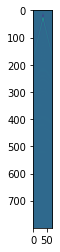

In [63]:
plt.imshow(A[4,:,:])

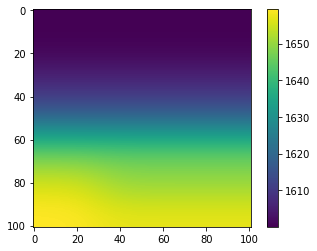

In [98]:
import matplotlib.pyplot as plt
plt.imshow(C)
plt.colorbar()

In [99]:
os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/testA')
os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/testB')

os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/testA')
os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/testB')

0

In [100]:
start = 1
test_size = TestSize
in_channels = Inchannels
model_dim = ModelDim
kk = 0
for i in range(start+train_size1,start+train_size1+test_size):
    kk = kk + 1
    filename_seis = train_data_dir+'georec_train/'+datafilename+str(i)
    print(filename_seis)
        # Load .mat data
    data1_set = scipy.io.loadmat(filename_seis)
        #data1_set = np.float32(data1_set[str(dataname)].reshape([data_dim[0],data_dim[1],in_channels]))
    data1_set = np.float32(data1_set[str(dataname)])
        # Change the dimention [h, w, c] --> [c, h, w]
    for k in range (0,in_channels):
        data11_set     = np.float32(data1_set[:,:,k])
        data11_set     = np.float32(data11_set)
        # Data downsampling
        # note that the len(data11_set.shape)=len(block_size.shape)=2
        #data11_set     = block_reduce(data11_set,block_size=data_dsp_blk,func=decimate)
        #data11_set     = data11_set[1:2000:5,:]
        data11_set     = np.expand_dims(data11_set,axis=0)
        data_dsp_dim   = data11_set.shape
        #data11_set     = data11_set.reshape(1,data_dsp_dim[0]*data_dsp_dim[1])
        if k==0:
            train1_set = data11_set
        else:
            train1_set = np.append(train1_set,data11_set,axis=0)
    filename_label     = train_data_dir+'vmodel_train/'+truthfilename+str(i)
    data2_set          = scipy.io.loadmat(filename_label)
    data2_set          = resize(data2_set[str(truthname)],(101,101))
        # Label downsampling
    #data2_set          = block_reduce(data2_set,block_size=label_dsp_blk,func=np.max)
    label_dsp_dim      = data2_set.shape
    #data2_set          = data2_set.reshape(1,label_dsp_dim[0]*label_dsp_dim[1])
    data2_set          = np.float32(data2_set)
    #if i==start:
    #    train_set      = train1_set
    #    label_set      = data2_set
    #else:
    #    train_set      = np.append(train_set,train1_set,axis=0)
    #    label_set      = np.append(label_set,data2_set,axis=0)
        
    A = train1_set
    B = data2_set
    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/testA/'+str(kk)+'.npy','wb')
    np.save(file,A)
    file.close()
    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/testB/'+str(kk)+'.npy','wb')
    np.save(file,B)
    file.close()
            
#train_set = train_set.reshape((train_size,in_channels,data_dsp_dim[0]*data_dsp_dim[1]))
#label_set = label_set.reshape((train_size,1,label_dsp_dim[0]*label_dsp_dim[1]))
    


/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec451
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec452
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec453
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec454
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec455
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec456
/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/data/train_data/SimulateData/georec_train/georec457
/disk/student

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
# Define a plot function to plot two slices. Made some modifications to fit a colorbar to it.
def plot_two_slices(data1,data2,title1='',title2=''):
    aspect = 20
    pad_fraction = 0.5
    
    #gs = plt.GridSpec(1, 1)
    fig,ax = plt.subplots(1,2, figsize = (20,40));

    # Plot the first section
    im1 = ax[0].imshow(np.squeeze(data1))

    ax[0].set(title=title1)
    divider = make_axes_locatable(ax[0])
    width = axes_size.AxesY(ax[0], aspect=1./aspect)
    pad = axes_size.Fraction(pad_fraction, width)
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.colorbar(im1, cax=cax)
    
    #Plot the second section
    im2 = ax[1].imshow(np.squeeze(data2))

    ax[1].set(title=title2)
    divider = make_axes_locatable(ax[1])
    width = axes_size.AxesY(ax[1], aspect=1./aspect)
    pad = axes_size.Fraction(pad_fraction, width)
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.colorbar(im2, cax=cax)
    
    plt.subplots_adjust(wspace = 0.2)
    #plt.colorbar(im, ax=ax)
    plt.show()

In [ ]:
tex = 9
def plotRealVel():
    
    #create figure
    fig = plt.figure(figsize=(9,9))
    #ax.axis('off')
    
    rows = 3
    columns = 3
    
    for i in range(tex):
        ax = fig.add_subplot(rows,columns,i+1)
        #kk=starting+i
        filename='/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output1/'+str(i+1)+'_real_BT.npy'
        mat=np.load(filename)
        mat = mat*100
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(np.squeeze(mat))
        plt.colorbar()
        plt.axis('off')
        plt.tight_layout()
        #ax.box(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.axis('off')
        
        
def plotFakeVel():
    
    #create figure
    fig = plt.figure(figsize=(9,9))
    
    rows = 3
    columns = 3
    
    for i in range(tex):
        ax = fig.add_subplot(rows,columns,i+1)
        #kk=starting+i
        filename='/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output3/'+str(i+1)+'_fake_BT.npy'
        mat=np.load(filename)
        mat = mat*100
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(np.squeeze(mat))
        plt.colorbar()
        plt.axis('off')
        plt.tight_layout()
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.axis('off')
        
        
        
def plotFakeVelNewMean():
    
    #create figure
    fig1 = plt.figure(figsize=(9,9))
    #fig2 = plt.figure(figsize=(15,15))
    
    rows = 3
    columns = 3
    matVel = np.zeros((15,tex,101,101))
    for k in range(15):
        filename='/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output'+str(k)+'/'    
        for i in range(tex):
            #fig.add_subplot(rows,columns,i+1)
            #kk=starting+i
            onefile = filename+str(i+1)+'_fake_BT.npy'
            mat=np.load(onefile)
            mat = mat*100
            matVel[k,i,:,:] = mat
            
    mean = np.mean(matVel,axis=0)
    std = np.std(matVel,axis=0)
    
    #plt.imshow(mean[0,:,:])
    
    #print("mean :", mean[0,:,:])
    
    for i in range(tex):
        ax = fig1.add_subplot(rows,columns,i+1)
    #    #kk=starting+i
        plt.imshow(mean[i,:,:])
        plt.colorbar()
        plt.axis('off')
        plt.tight_layout()
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.axis('off')
        

def plotFakeVelNewStd():
    
    #create figure
    fig1 = plt.figure(figsize=(9,9))
    #fig2 = plt.figure(figsize=(15,15))
    
    rows = 3
    columns = 3
    matVel = np.zeros((15,tex,101,101))
    for k in range(15):
        filename='/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output'+str(k)+'/'    
        for i in range(tex):
            #fig.add_subplot(rows,columns,i+1)
            #kk=starting+i
            onefile = filename+str(i+1)+'_fake_BT.npy'
            mat=np.load(onefile)
            mat = mat*100
            matVel[k,i,:,:] = mat
            
    mean = np.mean(matVel,axis=0)
    std = np.std(matVel,axis=0)
    
    #plt.imshow(mean[0,:,:])
    
    #print("mean :", mean[0,:,:])
    
    for i in range(tex):
        ax = fig1.add_subplot(rows,columns,i+1)
    #    #kk=starting+i
        plt.imshow(std[i,:,:])
        plt.colorbar()
        plt.axis('off')
        plt.tight_layout()
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.axis('off')
        
def plotOneVel(i):
        
    #create figure
    fig1 = plt.figure(figsize=(9,9))
    #fig2 = plt.figure(figsize=(5,5))
    #fig2 = plt.figure(figsize=(15,15))
    
    filename='/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output'+str(1)+'/'    
        #fig.add_subplot(rows,columns,i+1)
        #kk=starting+i
    onefilef = filename+str(i)+'_real_BT.npy'
    matt=np.load(onefilef)
    matt = matt*100
    #matVel[k,:,:] = mat

    rows = 3
    columns = 1
    matVel = np.zeros((15,101,101))
    for k in range(15):
        filename='/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output'+str(k)+'/'    
        #fig.add_subplot(rows,columns,i+1)
        #kk=starting+i
        onefilef = filename+str(i)+'_fake_BT.npy'
        mat=np.load(onefilef)
        mat = mat*100
        matVel[k,:,:] = mat
        
    mean = np.mean(matVel, axis=0)
    std = np.std(matVel, axis=0)
    
    ax = fig1.add_subplot(rows,columns,3)
    #kk=starting+i
    plt.imshow(std[:,:])
    np.save('stdvaenormalizing'+str(i)+'.npy',std)
    plt.colorbar()
    plt.axis('off')
    plt.tight_layout()
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axis('off')
        
    ax = fig1.add_subplot(rows,columns,2)
    #kk=starting+i
    plt.imshow(mean[:,:],vmin=2000,vmax=4500)
    np.save('meanvaenormalizing'+str(i)+'.npy',mean)
    plt.colorbar()
    plt.axis('off')
    plt.tight_layout()
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axis('off')
    
    ax = fig1.add_subplot(rows,columns,1)
    #kk=starting+i
    plt.imshow(np.squeeze(matt),vmin=2000,vmax=4500)
    np.save('truevaenormalizing'+str(i)+'.npy',mean)         
    plt.colorbar()
    plt.axis('off')
    plt.tight_layout()
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axis('off')
 
        #fig.add_subplot(rows, columns, i+1)
        #plt.imshow(np.squeeze(mat))
        #plt.colorbar()
        #plt.axis('off')
        #plt.tight_layout()
        

In [ ]:
plotOneVel(22)

#### real = np.load('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output/_real_BT.npy')
fake = np.load('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output/1_fake_BT.npy')
real = real*(4500-2000)+2000
fake = fake*(4500-2000)+2000
plot_two_slices(real,fake,title1='real',title2='fake')

In [ ]:
real = np.load('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output/30_real_BT.npy')
fake = np.load('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/Output/30_fake_BT.npy')
real = real*(4500-2000)+2000
fake = fake*(4500-2000)+2000
plot_two_slices(real,fake,title1='real',title2='fake')

In [ ]:
data = np.load('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/trainA/30.npy')
np.shape(data)


In [ ]:
plt.figure(figsize=(12, 3))
plt.imshow(np.squeeze(data[7,:,:]),vmin=-.05,vmax=.05, aspect='auto')
plt.title('data')

In [ ]:
po1 = np.load('/glb/hou/pt.sgs/data/ml_ai_us/4d/usadh7/github_repos/FCNVMB-Deep-learning-based-seismic-velocity-model-building/ftout1.npy')
po2 = np.load('/glb/hou/pt.sgs/data/ml_ai_us/4d/usadh7/github_repos/FCNVMB-Deep-learning-based-seismic-velocity-model-building/ftout2.npy')

In [ ]:
plot_two_slices(po1,po2,title1='t1',title2='t2')

In [ ]:
plt.imshow(po1-po2)